# **PRAKTIKUM DAMIN MODUL 5**
Nama : Annisa Novantika\
NIM : 121450005\
Kelas : RC

# **Tugas Individu**
a) Dengan menggunakan dataset Social_Network_Ads.csv selesaikan semua
langkah-langkah yang ada pada modul ini, kemudain lakukan analisis
perbandingan hasil evaluasi performa penggunaan model Naïve Bayes dan
Support Vector Machine (SVM)!\
b) Pilih minimal 3 dataset yang ada pada http://bit.ly/45VVB6X . Kemudian
lakukan klasifikasi dengan model Naïve Bayes dan Support Vector Machine
(SVM)! . Analisis data dengan hasil yang anda dapatkan !. Buat laporan dalam
file PDF yang berisi:\
i) Deskripsikan dan eksplor data yang anda pilih,\
ii) flowchart praktikum,\
iii) hasil (berupa tabel) dan analisis hasil

# a) Dengan menggunakan dataset Social_Network_Ads.csv selesaikan semua langkah-langkah yang ada pada modul ini, kemudain lakukan analisis perbandingan hasil evaluasi performa penggunaan model Naïve Bayes dan Support Vector Machine (SVM)!



## **Praktikum 1 : Implementasi Klasifikasi Naïve Bayes**

### 1. Import Libraries

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### 2. Import data

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 3. Data Analysis / Preprocessing




#### a. Drop data

In [ ]:
df = df.drop('User ID', axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


#### b. Deskripsi data



In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#### c. Distribusi data

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

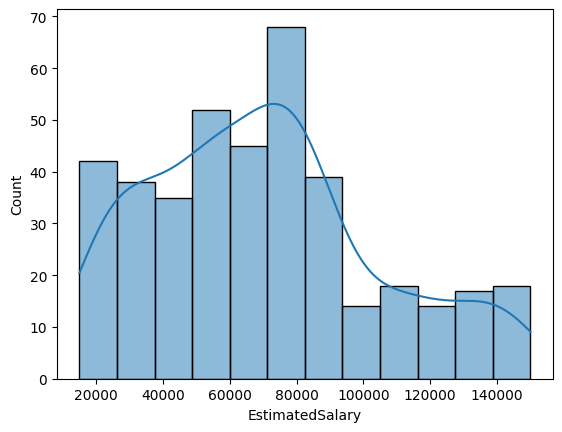

In [ ]:
sns.histplot(df['EstimatedSalary'], kde = True)

#### d. Label encoding

In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


#### e. Correlation matrix

In [ ]:
korelasi = df.corr()
korelasi

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

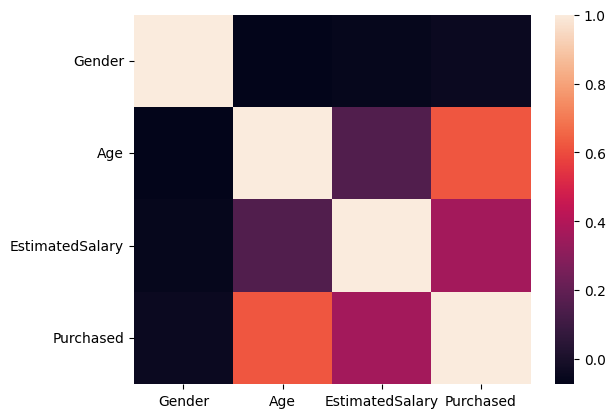

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

### 4. Drop insignificant data

In [ ]:
df.drop(columns=['Gender'], inplace = True)

### 5. Relationship

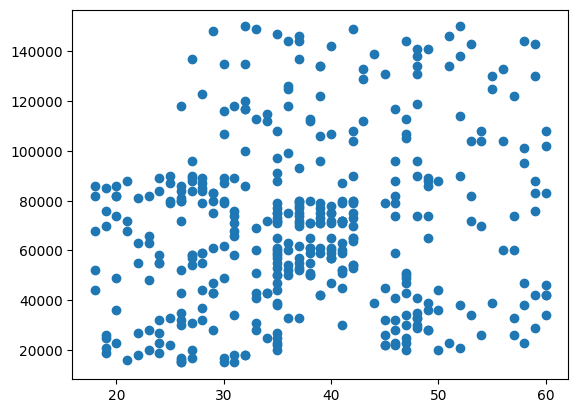

In [ ]:
plt.scatter(df['Age'], df['EstimatedSalary'])

### 6. Split data

#### a) Variabel Independen / Dependen

In [ ]:
# Split data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### b) Train/Test Split

In [ ]:
#Split data into test/train net
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 7. Feature Scalling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

### 8. Train Model

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### 9. Predict result/Score model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), 1))

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]]


### 10. Evaluasi model


Accuracy : 
0.93
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.86      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

F1 Score : 0.9014084507042254


<Axes: >

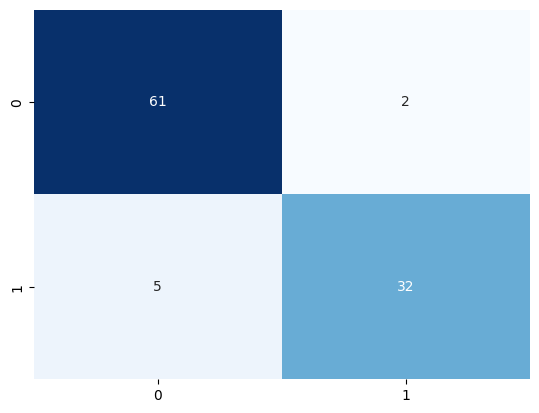

In [ ]:
#Accuracy
print(f'Accuracy : \n{accuracy_score(y_test, y_pred)}')

#Classification Report
print(f'Classification Report : \n {classification_report(y_test, y_pred)}')

#F1 Score
print(f'F1 Score : {f1_score(y_test, y_pred)}')

#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)


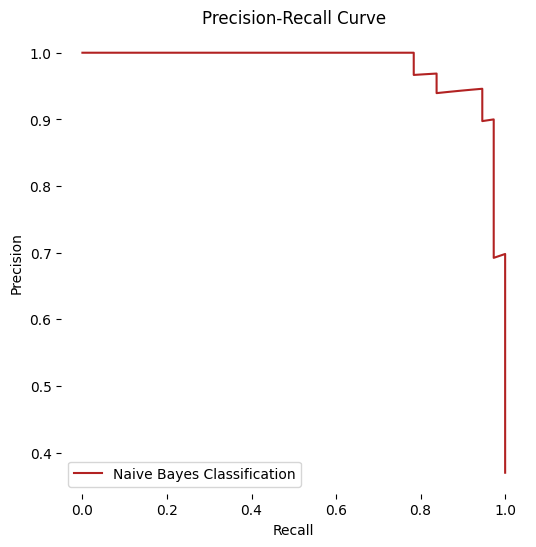

In [ ]:
# Precision-Recall curve
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(recall, precision, label='Naive Bayes Classification', color='firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend()

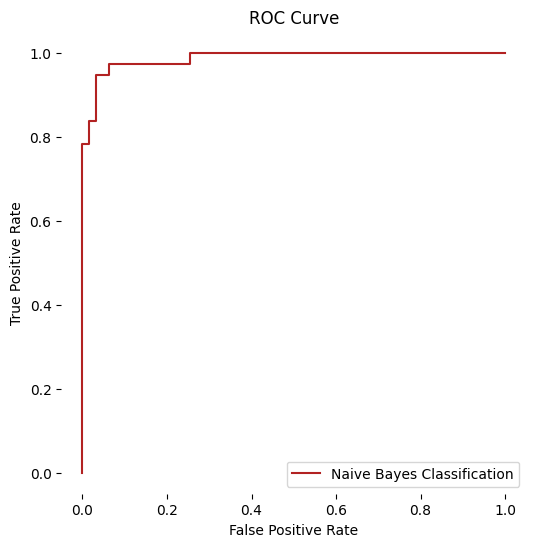

In [ ]:
import matplotlib.pyplot as plt

# Plot ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color='firebrick')

# Set judul dan label sumbu
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)

# Tambahkan legenda
ax.legend()


### 11. Visualization predictions



- Predict result on the training set

<ipython-input-695-d7941746948d>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


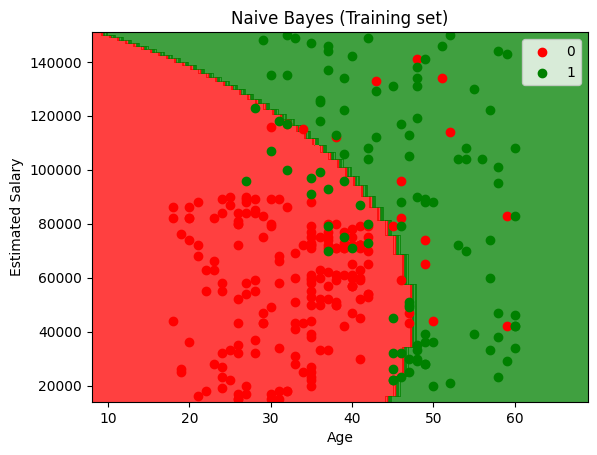

In [ ]:
# Visualize prediction results on training set

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

- Prediction result on the test set

<ipython-input-696-68f81d3c7890>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter (X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap (('red', 'green')) (i), label = j)


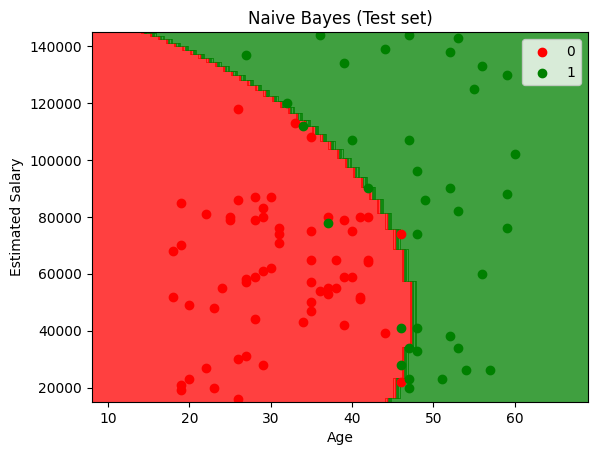

In [ ]:
#Visualize prediction results on test set
X_set, y_set = sc.inverse_transform (X_test), y_test
X1, X2 = np.meshgrid (np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform (np.array([X1.ravel(), X2.ravel()]).T)). reshape (X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np. unique (y_set)):
    plt.scatter (X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap (('red', 'green')) (i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Example

In [ ]:
print(classifier.predict(sc.transform([[45, 97000]])))

[1]


## **Praktikum 2 : Implementasi Klasifikasi Support Vector Machine(SVM)**

### Import libraries

In [ ]:
from sklearn.svm import SVC

### Import data

In [ ]:
dfs = pd.read_csv('/content/Social_Network_Ads (1).csv')
dfs.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Analysis / Preprocessing

In [ ]:
to_drop = ["User ID"]
dfs = dfs.drop(to_drop, axis=1)
dfs.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
dfs.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<ipython-input-702-d4a77bff6106>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfs['EstimatedSalary'], kde = True);


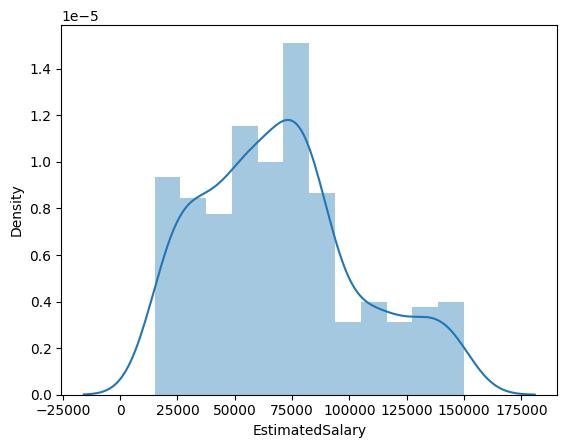

In [ ]:
sns.distplot(dfs['EstimatedSalary'], kde = True);

In [ ]:
dfs['Gender'].replace({'Male':1, 'Female':0},inplace = True)
dfs.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


                   Gender       Age  EstimatedSalary  Purchased
Gender           1.000000 -0.073741        -0.060435  -0.042469
Age             -0.073741  1.000000         0.155238   0.622454
EstimatedSalary -0.060435  0.155238         1.000000   0.362083
Purchased       -0.042469  0.622454         0.362083   1.000000




<Axes: >

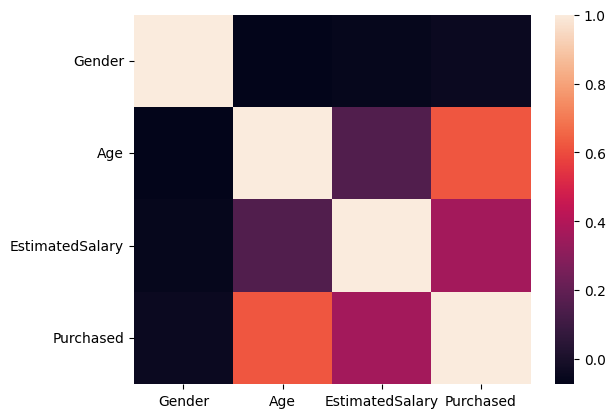

In [ ]:
korelasi = dfs.corr()
print(korelasi)
print("\n")
sns.heatmap(dfs.corr())

### Split Data

In [ ]:
# Split data into dependent/independent variables
X = dfs[['Age','EstimatedSalary']].values
y = dfs.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((300, 2), (100, 2))

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train Model

In [ ]:
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [ ]:
print("> Akurasi Score : ",accuracy_score(y_test, y_pred),"\n")
print(f'> Classification Report: \n{classification_report (y_test, y_pred)}','\n')
print(f"> F1 Score: {f1_score(y_test, y_pred)}")

> Akurasi Score :  0.82 

> Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        58
           1       0.83      0.71      0.77        42

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100
 

> F1 Score: 0.7692307692307692


<Axes: >

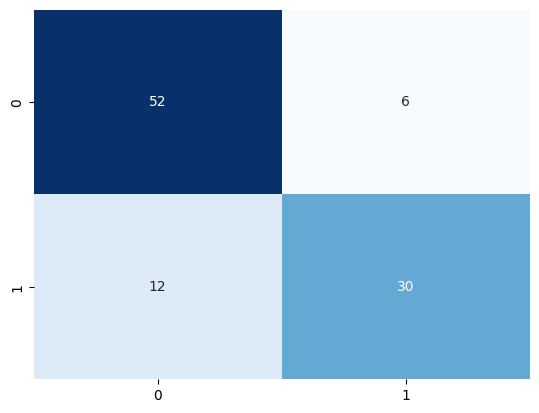

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

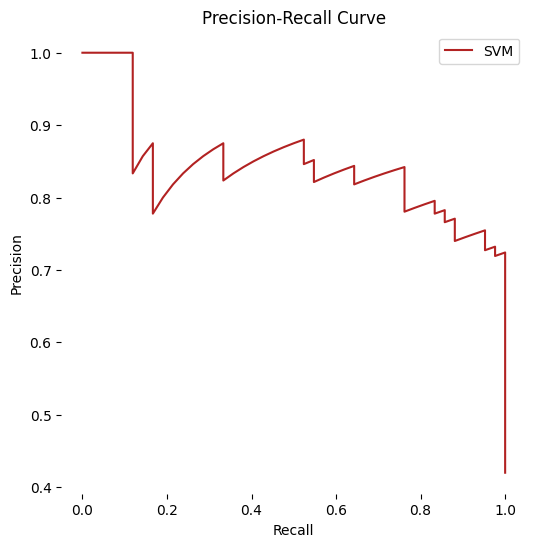

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

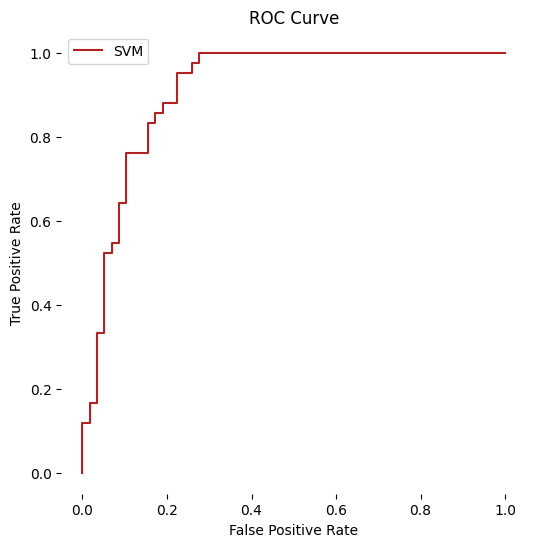

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-713-6663d3030ee8>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


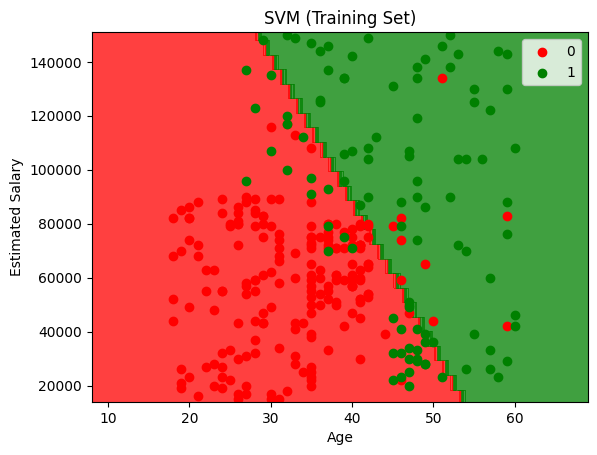

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-714-d93fd5a11852>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


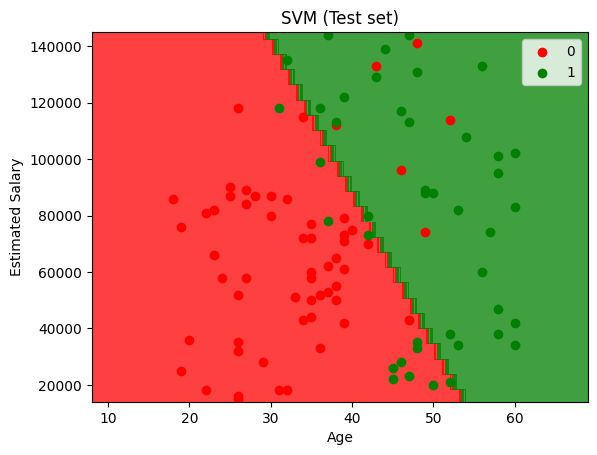

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Example

In [ ]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


# b) Pilih minimal 3 dataset yang ada pada http://bit.ly/45VVB6X . Kemudian lakukan klasifikasi dengan model Naïve Bayes dan Support Vector Machine (SVM)! . Analisis data dengan hasil yang anda dapatkan !. Buat laporan dalam file PDF yang berisi:
i) Deskripsikan dan eksplor data yang anda pilih, \
ii) flowchart praktikum,\
iii) hasil (berupa tabel) dan analisis hasil


## **Dataset 1**

###  Implementasi Klasifikasi Naïve Bayes

#### 1. Import Libraries

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#### 2. Import Data

In [ ]:
df3 = pd.read_csv('/content/student (1).csv')
df3.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


#### 3. Data Analysis / Preprocessing




In [ ]:
df3 = df3.drop('Student_id', axis=1)
df3.head()

,Age,Gender,Grade,Employed
0,19,Male,1st Class,yes
1,20,Female,2nd Class,no
2,18,Male,1st Class,no
3,21,Female,2nd Class,no
4,19,Male,1st Class,no


In [ ]:
df3.describe()

,Age
count,232.000000
mean,19.896552
std,1.030944
min,18.000000
25%,19.000000
50%,20.000000
75%,21.000000
max,22.000000


<ipython-input-720-5ce59120ddc2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Age'], kde = True);


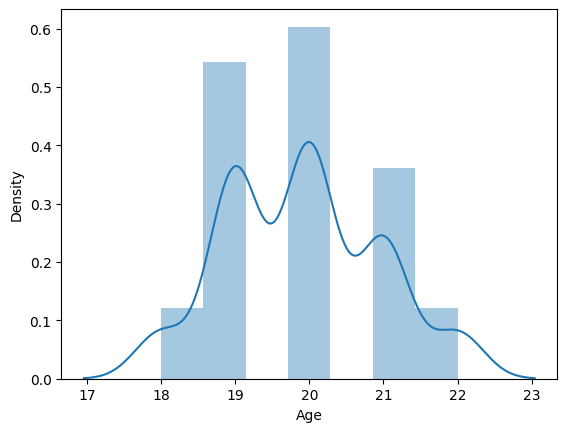

In [ ]:
sns.distplot(df3['Age'], kde = True);

In [ ]:
df3.replace({'Male': 1, 'Female': 0},inplace = True)
df3.replace({'1st Class':1, '2nd Class':2, '3rd Class':3},inplace = True)
df3.replace({'yes':1, 'no':0},inplace = True)
df3.head()

,Age,Gender,Grade,Employed
0,19,1,1,1
1,20,0,2,0
2,18,1,1,0
3,21,0,2,0
4,19,1,1,0


In [ ]:
korelasi = df3.corr()
korelasi

,Age,Gender,Grade,Employed
Age,1.000000,-0.084487,0.294436,0.14606
Gender,-0.084487,1.000000,-0.310482,-0.00061
Grade,0.294436,-0.310482,1.000000,0.14641
Employed,0.146060,-0.000610,0.146410,1.00000


<Axes: >

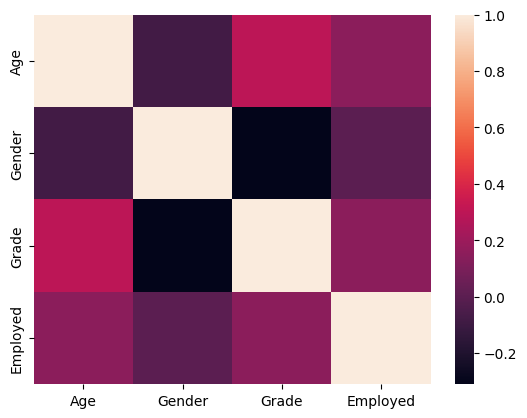

In [ ]:
import seaborn as sns
sns.heatmap(df3.corr())

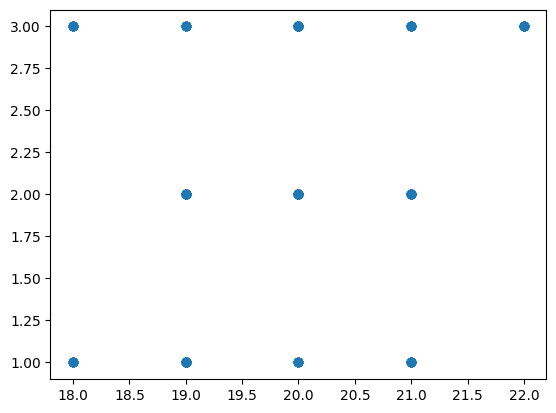

In [ ]:
plt.scatter(df3['Age'], df3['Grade'])

#### 4. Split data

In [ ]:
# Split data into dependent/independent variables
X = df3[['Age','Grade']].values
y = df3.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1, test_size = .25)
X_train.shape, X_test.shape

((174, 2), (58, 2))

#### 5. Feature Scalling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 6. Train Model

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

#### 7. Predict result / Score model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]]


In [ ]:
#Accuracy
print(f'Accuracy : \n{accuracy_score(y_test, y_pred)}')

#Classification Report
print(f'Classification Report : \n {classification_report(y_test, y_pred)}')

#F1 Score
print(f'F1 Score : {f1_score(y_test, y_pred)}')



Accuracy : 
0.5862068965517241
Classification Report : 
               precision    recall  f1-score   support

           0       0.61      0.82      0.70        34
           1       0.50      0.25      0.33        24

    accuracy                           0.59        58
   macro avg       0.55      0.54      0.52        58
weighted avg       0.56      0.59      0.55        58

F1 Score : 0.3333333333333333


<Axes: >

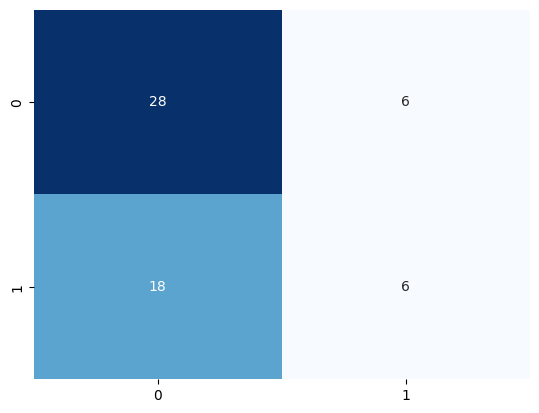

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

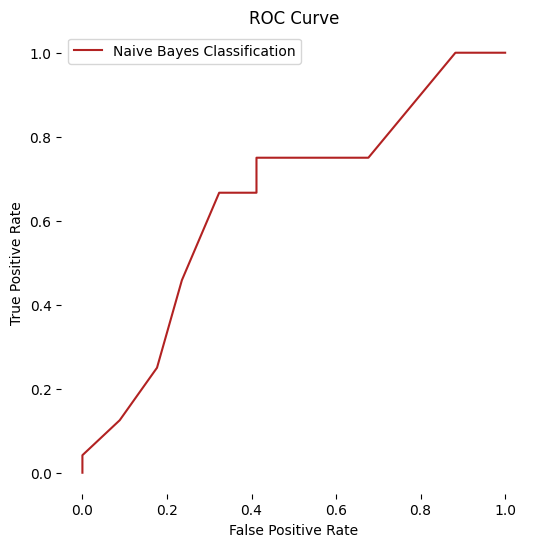

In [ ]:
import matplotlib.pyplot as plt

# Plot ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color='firebrick')

# Set judul dan label sumbu
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)

# Tambahkan legenda
ax.legend()


#### 9. Visualization predictions

<ipython-input-733-758273475888>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


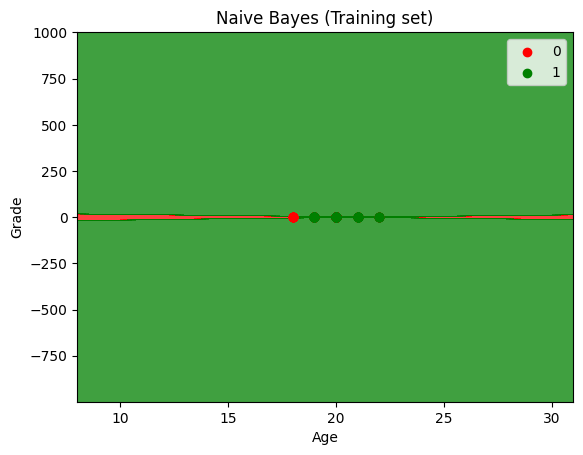

In [ ]:
# Visualize prediction results on training set

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show();

<ipython-input-734-8650fad5d7a0>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter (X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap (('red', 'green')) (i), label = j)


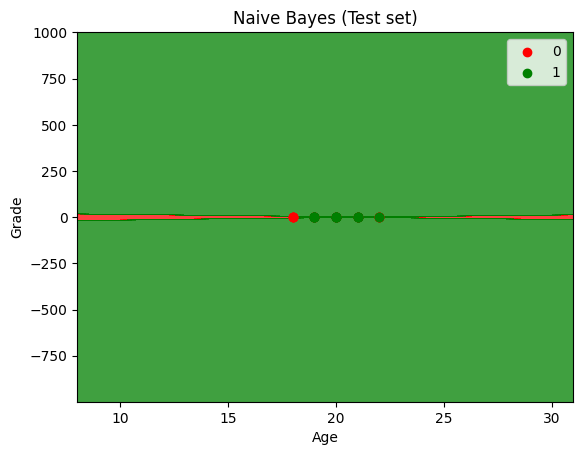

In [ ]:
#Visualize prediction results on test set
X_set, y_set = sc.inverse_transform (X_test), y_test
X1, X2 = np.meshgrid (np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform (np.array([X1.ravel(), X2.ravel()]).T)). reshape (X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np. unique (y_set)):
    plt.scatter (X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap (('red', 'green')) (i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

In [ ]:
print(classifier.predict(sc.transform([[60, 1]])))

[0]


###  **Implementasi Klasifikasi Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
df4 = pd.read_csv('/content/student (1).csv')
df4.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [ ]:
df4 = df4.drop('Student_id', axis=1)
df4.head()

,Age,Gender,Grade,Employed
0,19,Male,1st Class,yes
1,20,Female,2nd Class,no
2,18,Male,1st Class,no
3,21,Female,2nd Class,no
4,19,Male,1st Class,no


In [ ]:
df4.describe()

,Age
count,232.000000
mean,19.896552
std,1.030944
min,18.000000
25%,19.000000
50%,20.000000
75%,21.000000
max,22.000000


<Axes: xlabel='Age', ylabel='Count'>

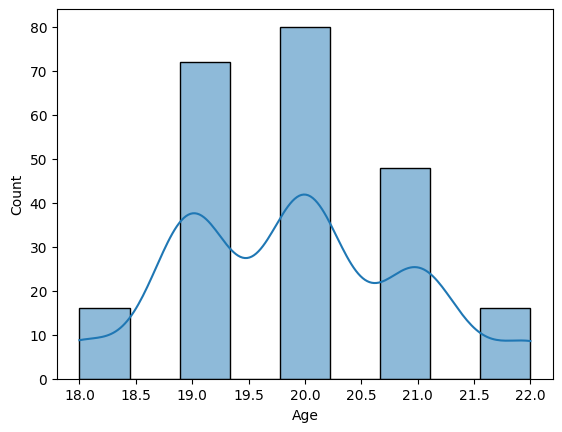

In [ ]:
sns.histplot(df4['Age'], kde = True)

In [ ]:
df4.replace({'Male': 1, 'Female': 0},inplace = True)
df4.replace({'1st Class':1, '2nd Class':2, '3rd Class':3},inplace = True)
df4.replace({'yes':1, 'no':0},inplace = True)
df4.head()

,Age,Gender,Grade,Employed
0,19,1,1,1
1,20,0,2,0
2,18,1,1,0
3,21,0,2,0
4,19,1,1,0


               Age    Gender     Grade  Employed
Age       1.000000 -0.084487  0.294436   0.14606
Gender   -0.084487  1.000000 -0.310482  -0.00061
Grade     0.294436 -0.310482  1.000000   0.14641
Employed  0.146060 -0.000610  0.146410   1.00000




<Axes: >

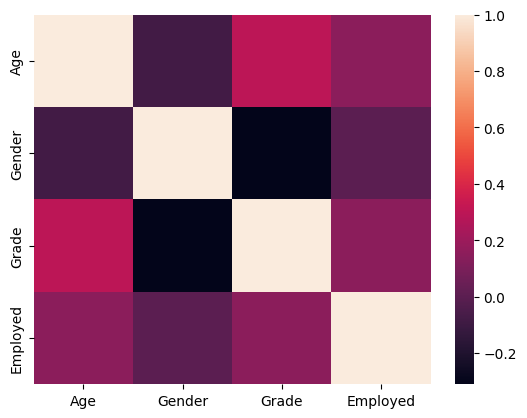

In [ ]:
korelasi = df4.corr()
print(korelasi)
print("\n")
sns.heatmap(df4.corr())

In [ ]:
# Split data into dependent/independent variables
X = df4[['Age','Grade']].values
y = df4.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((174, 2), (58, 2))

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Train model
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]]


In [ ]:
#Accuracy
print(f'Accuracy : \n{accuracy_score(y_test, y_pred)}')

#Classification Report
print(f'Classification Report : \n {classification_report(y_test, y_pred)}')

#F1 Score
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Accuracy : 
0.5862068965517241
Classification Report : 
               precision    recall  f1-score   support

           0       0.59      1.00      0.74        34
           1       0.00      0.00      0.00        24

    accuracy                           0.59        58
   macro avg       0.29      0.50      0.37        58
weighted avg       0.34      0.59      0.43        58

F1 Score : 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

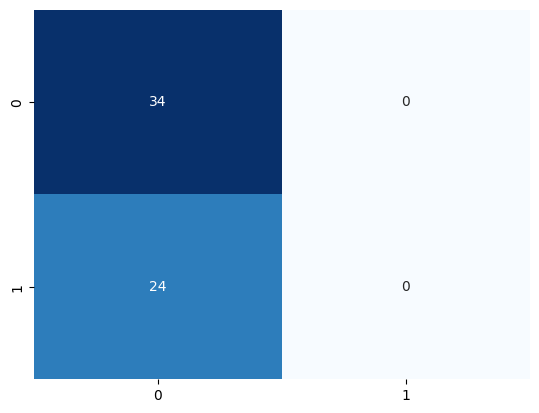

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

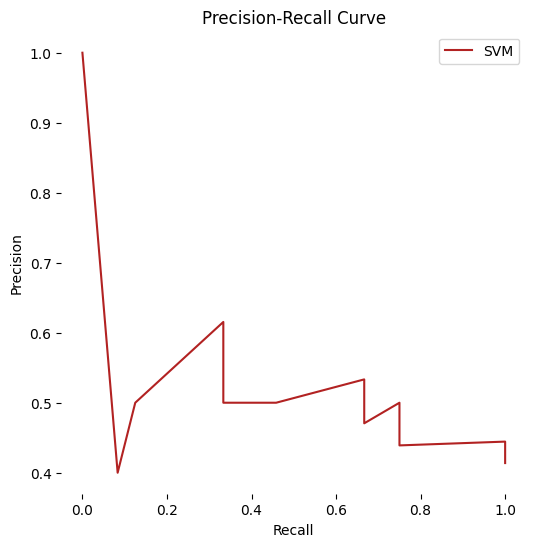

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

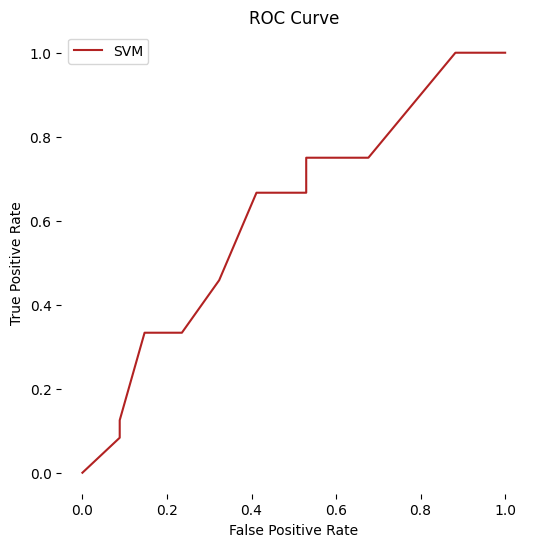

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-751-7e084ba13ace>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


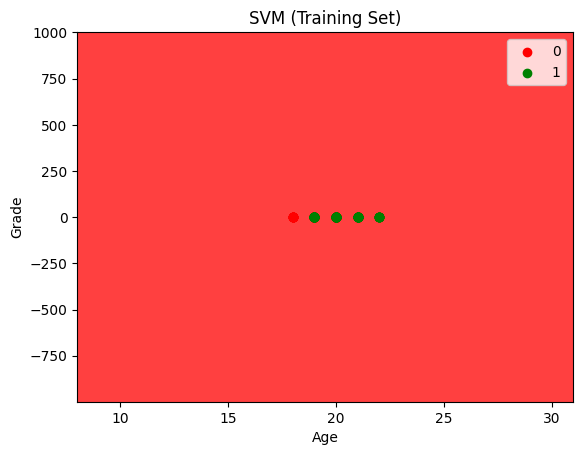

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

<ipython-input-752-cf889b1b6b3c>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


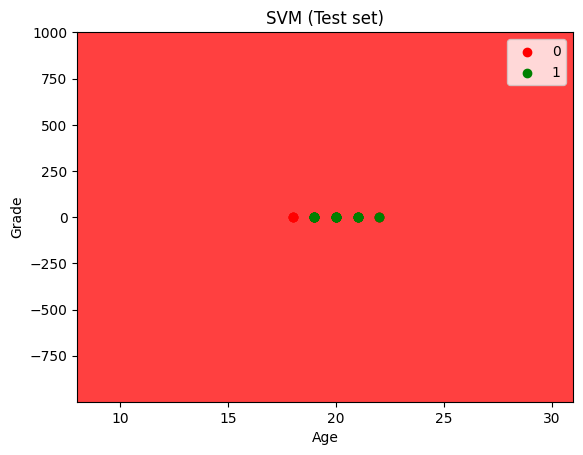

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

#### Example

In [ ]:
print(classifier.predict(sc.transform([[50, 1]])))

[0]


# Dataset 2


## **Implementasi Naive Bayes**

### Data Analysis / Preprocessing

In [ ]:
df2=pd.read_csv('/content/diabetes_RS1 (2).csv')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ipython-input-756-94f7ab7d2bf3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Age'], kde = True);


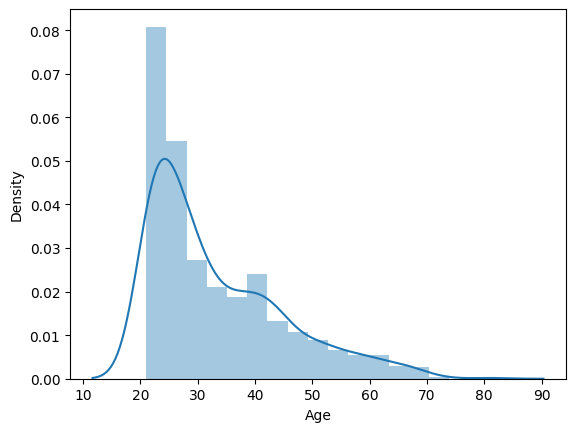

In [ ]:
sns.distplot(df2['Age'], kde = True);

In [ ]:
korelasi = df2.corr()
korelasi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

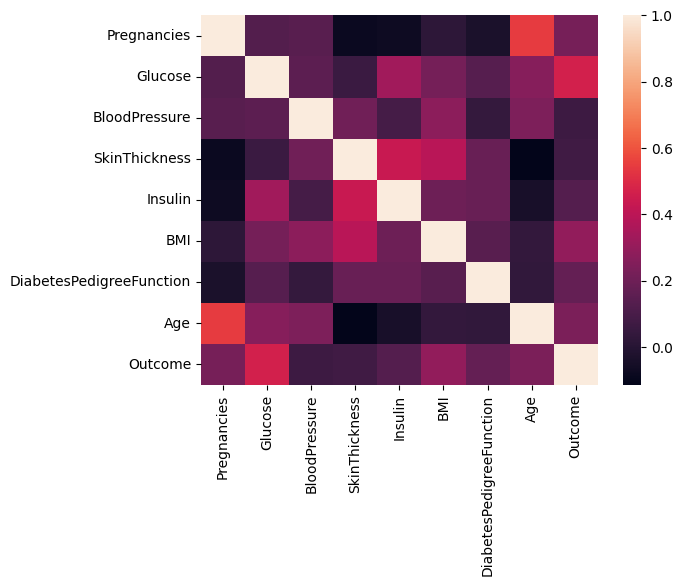

In [ ]:
sns.heatmap(df2.corr())

#### Split Data & Normalisasi

In [ ]:
# Split data into dependent/independent variables
X = df2[['Glucose','Age']].values
y = df2.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1, test_size = .25)
X_train.shape, X_test.shape

((576, 2), (192, 2))

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]

In [ ]:
print("> Akurasi Score : ",accuracy_score(y_test, y_pred),"\n")
print(f'> Classification Report: \n{classification_report (y_test, y_pred)}','\n')
print(f"> F1 Score: {f1_score(y_test, y_pred)}")

> Akurasi Score :  0.7552083333333334 

> Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       123
           1       0.71      0.54      0.61        69

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192
 

> F1 Score: 0.6115702479338844


<Axes: >

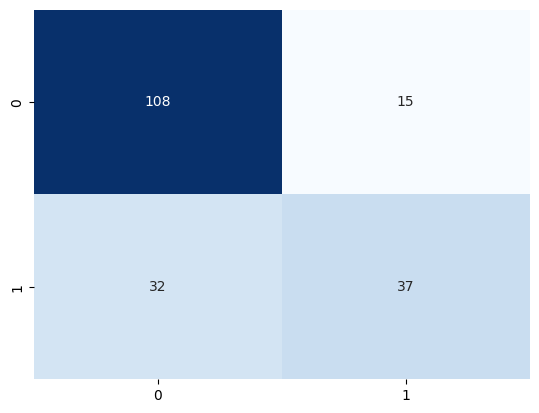

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

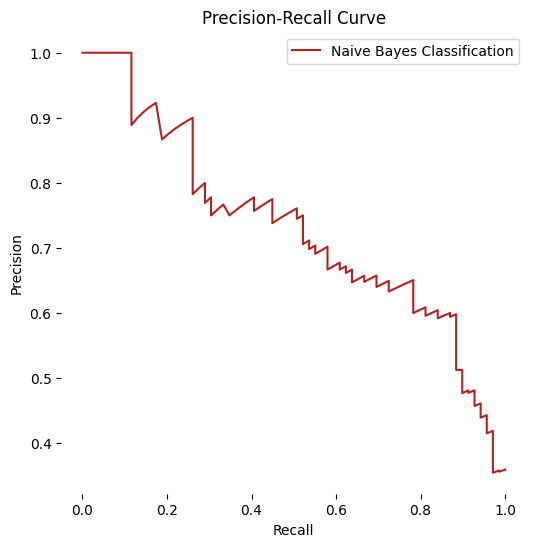

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(recall, precision, label='Naive Bayes Classification', color='firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

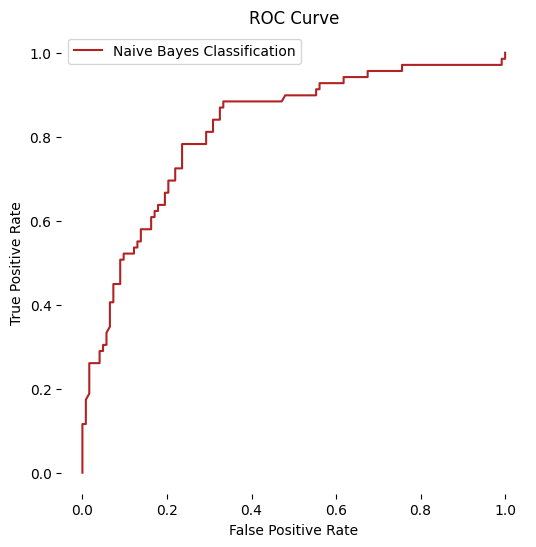

In [ ]:
# Plot ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color='firebrick')

# Set judul dan label sumbu
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)

# Tambahkan legenda
ax.legend();

<ipython-input-768-164a67111c7e>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


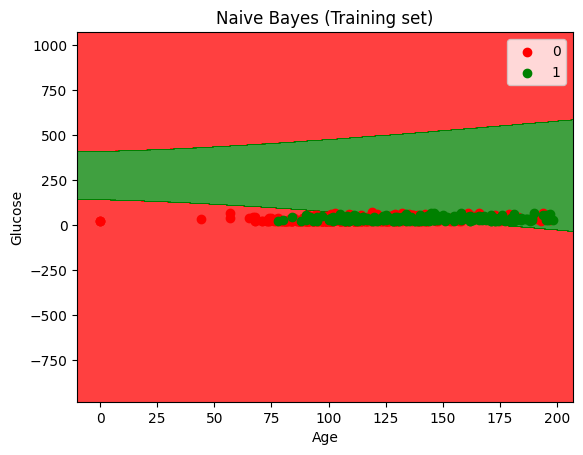

In [ ]:
# Visualize prediction results on training set

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show();

<ipython-input-769-8cd4f3c6dccc>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


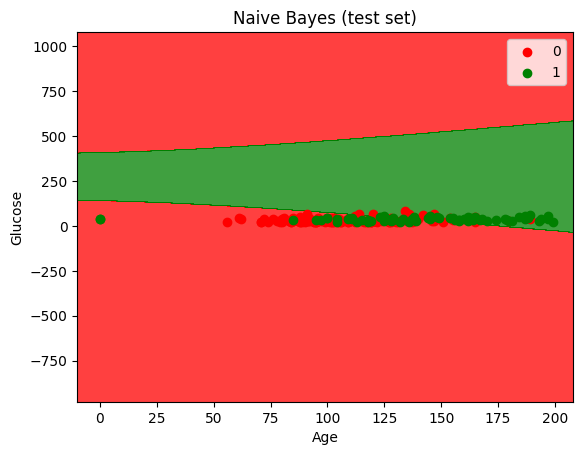

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show();

In [ ]:
print(classifier.predict(sc.transform([[45, 350]])))

[1]


## **Implementasi Klasifikasi Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
df5 = pd.read_csv('/content/diabetes_RS1 (2).csv')
df5.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df5.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Age', ylabel='Count'>

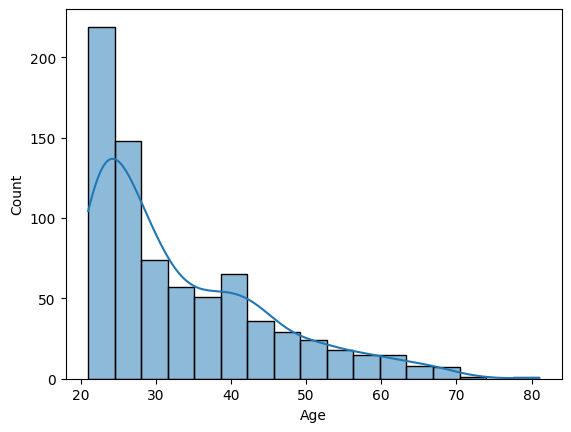

In [ ]:
sns.histplot(df5['Age'], kde = True)

<Axes: >

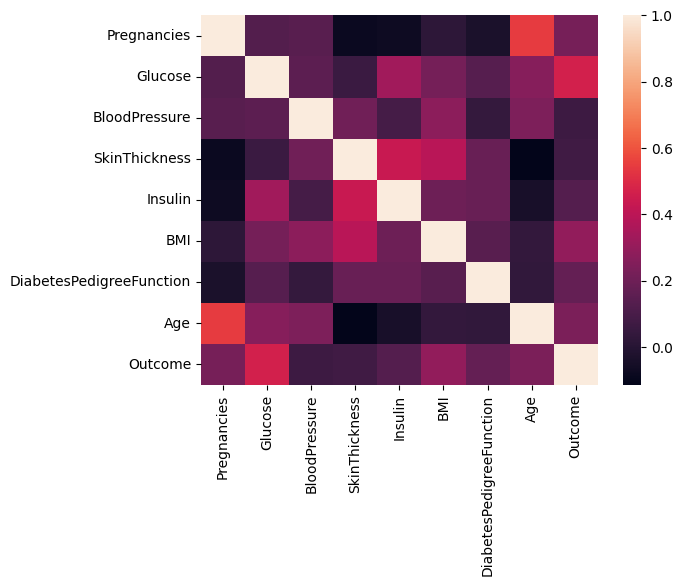

In [ ]:
korelasi = df5.corr()
korelasi

sns.heatmap(df5.corr())

In [ ]:
# Split data into dependent/independent variables
X = df5[['Glucose','Age']].values
y = df5.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((576, 2), (192, 2))

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]

In [ ]:
#Accuracy
print(f'Accuracy : \n{accuracy_score(y_test, y_pred)}')

#Classification Report
print(f'Classification Report : \n {classification_report(y_test, y_pred)}')

#F1 Score
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Accuracy : 
0.7447916666666666
Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       123
           1       0.69      0.52      0.60        69

    accuracy                           0.74       192
   macro avg       0.73      0.70      0.70       192
weighted avg       0.74      0.74      0.74       192

F1 Score : 0.5950413223140496


<Axes: >

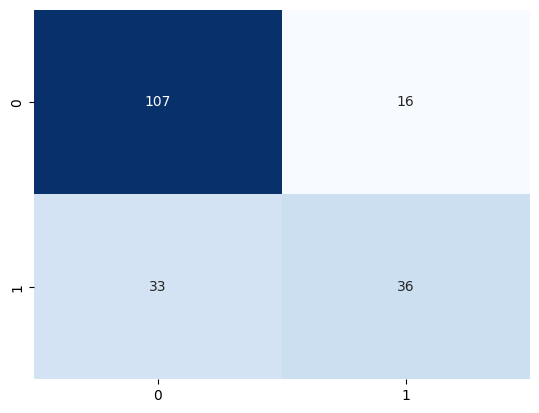

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

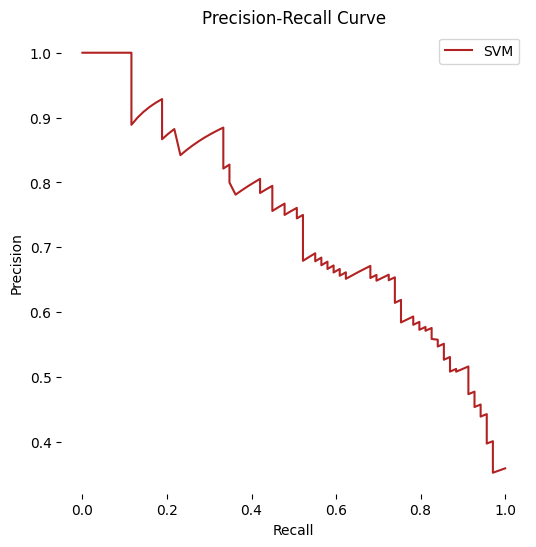

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

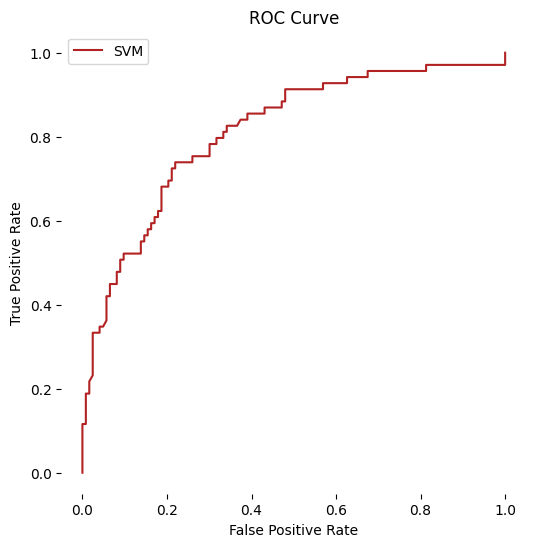

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-784-1d2ffbf7bbe3>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


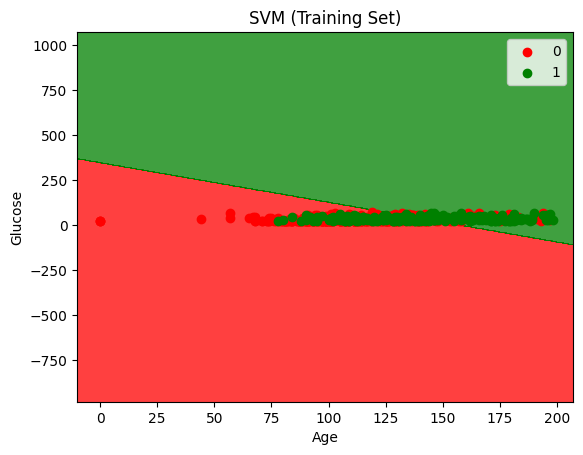

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

<ipython-input-785-a764e2a73e05>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


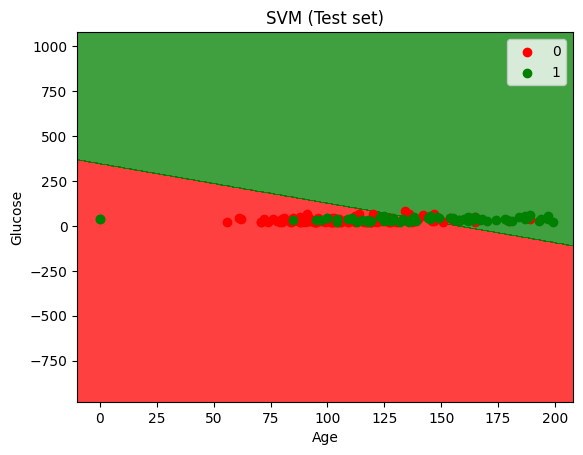

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

### Example

In [ ]:
print(classifier.predict(sc.transform([[45, 350]])))

[1]


# Dataset 3

## **Implementasi Klasifikasi Naïve Bayes**

In [ ]:
df6 = pd.read_csv('/content/penguins (1).csv')
df6.head()

,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [ ]:
df6['species'].replace({'Chinstrap':1,'Adelie':1, 'Gentoo':0},inplace = True)
df6 = df6.drop('Unnamed: 0', axis=1)
df6.head()

,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
3,36.7,19.3,193.0,3450.0,1
4,39.3,20.6,190.0,3650.0,1


In [ ]:
df6.describe()

,bill_length,bill_depth,flipper_length,body_mass,species
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,0.642643
std,5.468668,1.969235,14.015765,805.215802,0.479942
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,48.600000,18.700000,213.000000,4775.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


<ipython-input-790-026417ed8bb2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df6['body_mass'], kde = True);


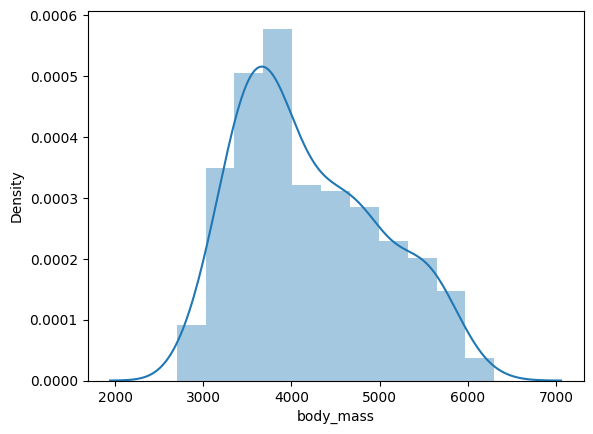

In [ ]:
sns.distplot(df6['body_mass'], kde = True);

                bill_length  bill_depth  flipper_length  body_mass   species
bill_length        1.000000   -0.228626        0.653096   0.589451 -0.488256
bill_depth        -0.228626    1.000000       -0.577792  -0.472016  0.822293
flipper_length     0.653096   -0.577792        1.000000   0.872979 -0.866854
body_mass          0.589451   -0.472016        0.872979   1.000000 -0.821178
species           -0.488256    0.822293       -0.866854  -0.821178  1.000000 



<Axes: >

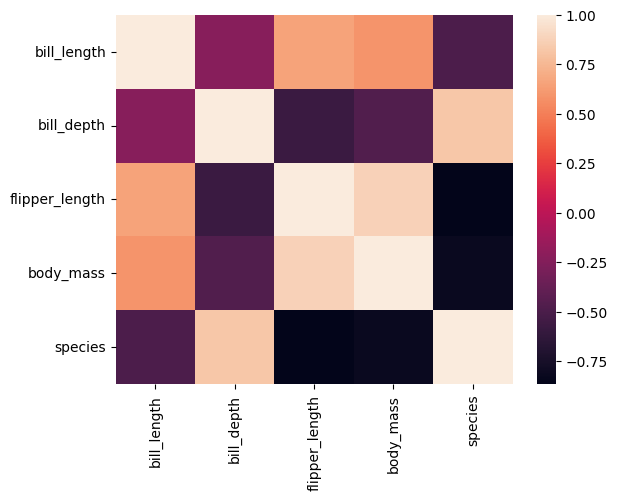

In [ ]:
korelasi = df6.corr()
print(korelasi,'\n')
sns.heatmap(df6.corr())

#### Split Data & Normalisasi

In [ ]:
# Split data into dependent/independent variables
X = df6[['flipper_length','body_mass']].values
y = df6.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1, test_size = .25)
X_train.shape, X_test.shape

((249, 2), (84, 2))

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
print("> Akurasi Score : ",accuracy_score(y_test, y_pred),"\n")
print(f'> Classification Report: \n{classification_report (y_test, y_pred)}','\n')
print(f"> F1 Score: {f1_score(y_test, y_pred)}")

> Akurasi Score :  0.9404761904761905 

> Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.90      0.95        52

    accuracy                           0.94        84
   macro avg       0.93      0.95      0.94        84
weighted avg       0.95      0.94      0.94        84
 

> F1 Score: 0.9494949494949495


<Axes: >

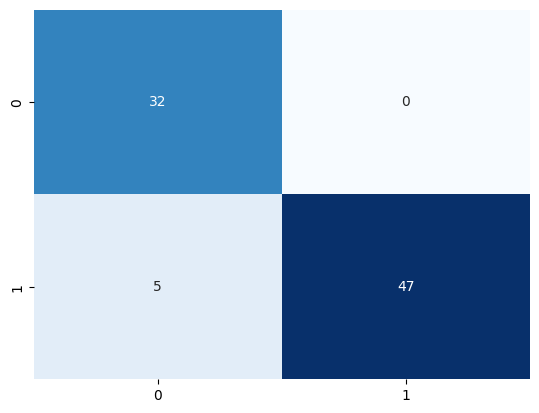

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

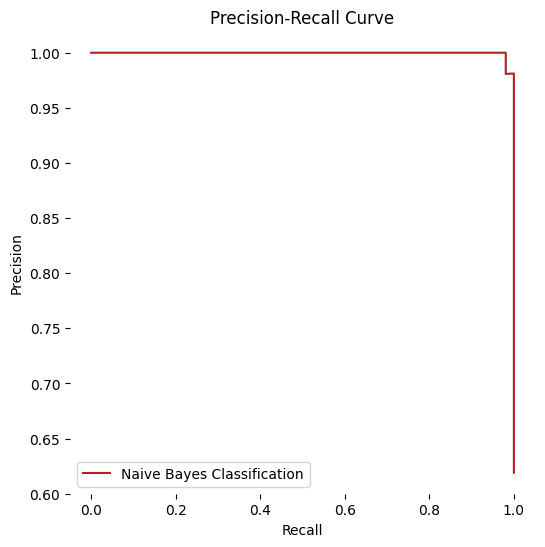

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(recall, precision, label='Naive Bayes Classification', color='firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

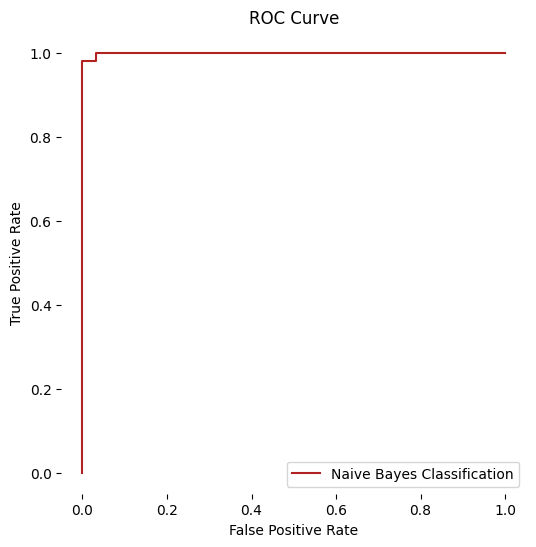

In [ ]:
# Plot ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color='firebrick')

# Set judul dan label sumbu
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)

# Tambahkan legenda
ax.legend();

<ipython-input-801-ab4d62c08268>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


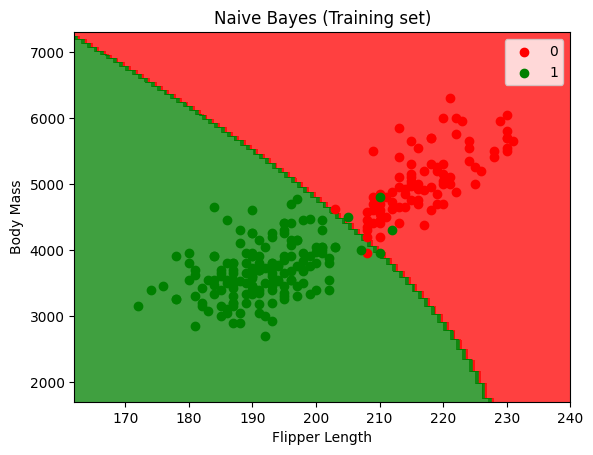

In [ ]:
# Visualize prediction results on training set

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')
plt.legend()
plt.show();

<ipython-input-802-0ce155ce78f4>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


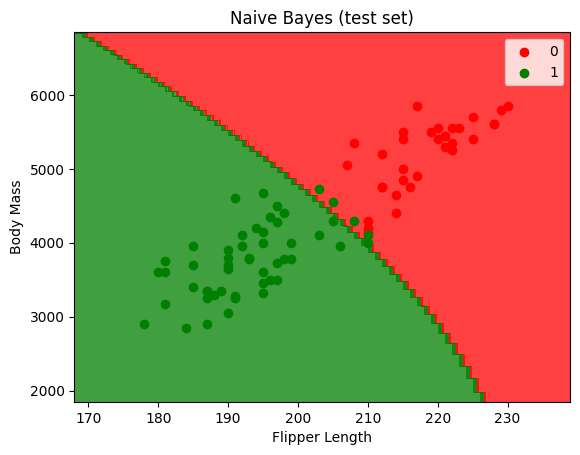

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')
plt.legend()
plt.show();

In [ ]:
print(classifier.predict(sc.transform([[182, 3500]])))

[1]


## **Implementasi Klasifikasi Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
df7 = pd.read_csv('/content/penguins (1).csv')
df7.head()

,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [ ]:
df7['species'].replace({'Chinstrap':1,'Adelie':1, 'Gentoo':0},inplace = True)
df7 = df7.drop('Unnamed: 0', axis=1)
df7.head()

,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
3,36.7,19.3,193.0,3450.0,1
4,39.3,20.6,190.0,3650.0,1


In [ ]:
df7.shape

(333, 5)

In [ ]:
df7.describe()

,bill_length,bill_depth,flipper_length,body_mass,species
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,0.642643
std,5.468668,1.969235,14.015765,805.215802,0.479942
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,48.600000,18.700000,213.000000,4775.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


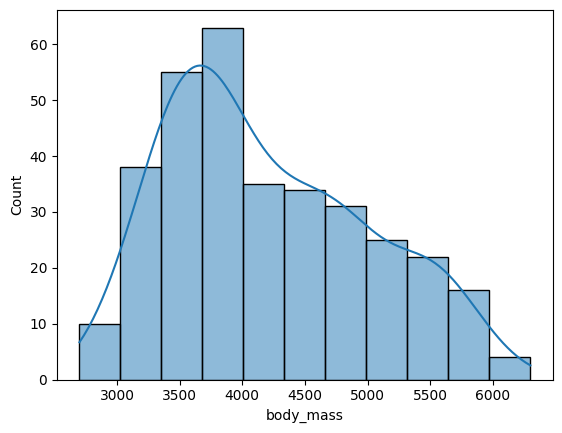

In [ ]:
sns.histplot(df7['body_mass'], kde = True);

                bill_length  bill_depth  flipper_length  body_mass   species
bill_length        1.000000   -0.228626        0.653096   0.589451 -0.488256
bill_depth        -0.228626    1.000000       -0.577792  -0.472016  0.822293
flipper_length     0.653096   -0.577792        1.000000   0.872979 -0.866854
body_mass          0.589451   -0.472016        0.872979   1.000000 -0.821178
species           -0.488256    0.822293       -0.866854  -0.821178  1.000000




<Axes: >

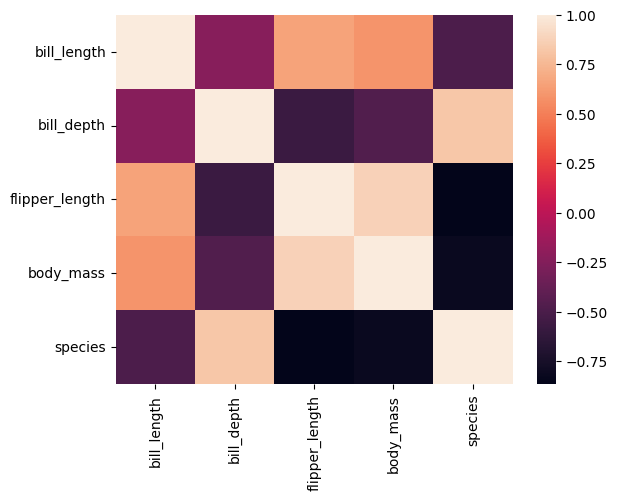

In [ ]:
korelasi = df7.corr()
print(korelasi)
print("\n")
sns.heatmap(df7.corr())

In [ ]:
# Split data into dependent/independent variables
X = df7[['flipper_length','body_mass']].values
y = df7.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((249, 2), (84, 2))

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
print("> Akurasi Score : ",accuracy_score(y_test, y_pred),"\n")
print(f'> Classification Report: \n{classification_report (y_test, y_pred)}','\n')
print(f"> F1 Score: {f_score(y_test, y_pred)}")

> Akurasi Score :  0.9404761904761905 

> Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.90      0.95        52

    accuracy                           0.94        84
   macro avg       0.93      0.95      0.94        84
weighted avg       0.95      0.94      0.94        84
 

> F1 Score: 0.9494949494949495


<Axes: >

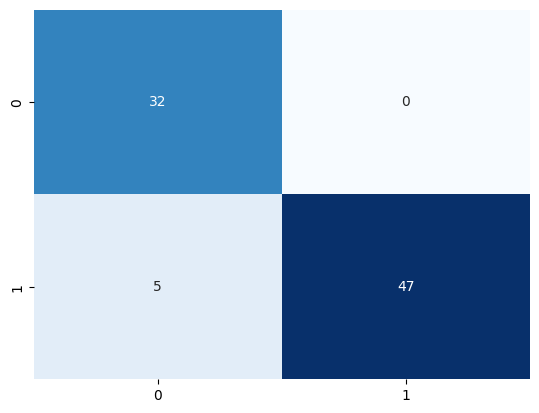

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

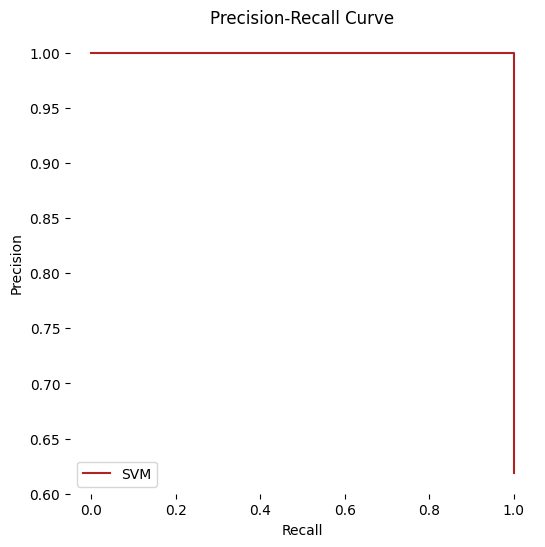

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

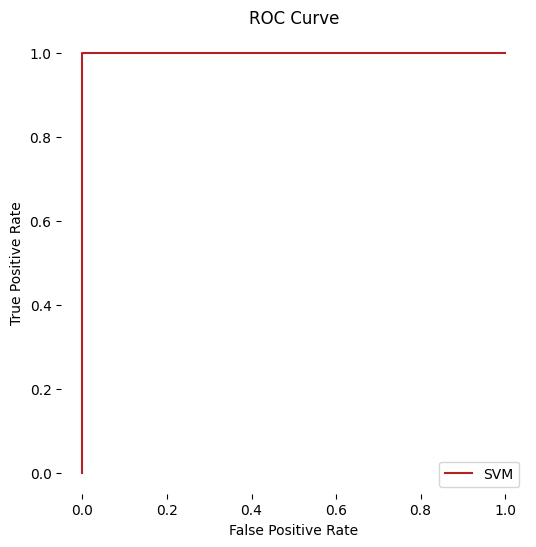

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-817-5b95ec25f5fa>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


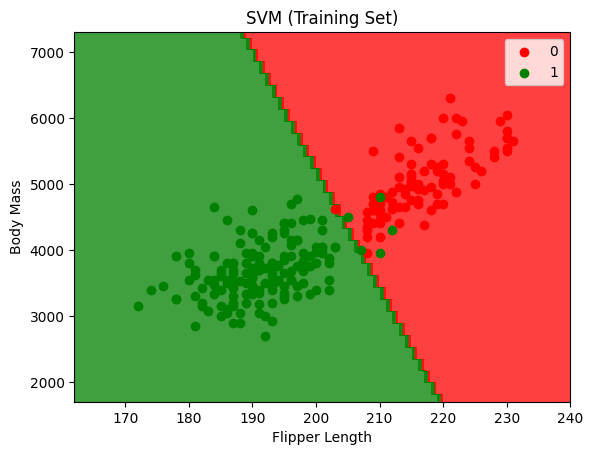

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training Set)')
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')
plt.legend()
plt.show()

<ipython-input-818-5e9b76ce1a10>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


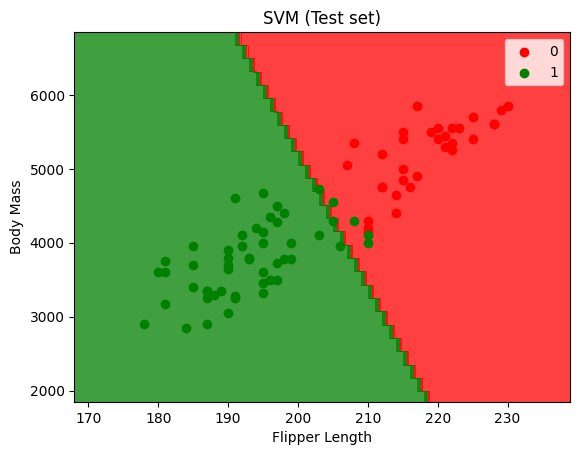

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')
plt.legend()
plt.show()

In [ ]:
print(classifier.predict(sc.transform([[182, 3500]])))

[1]
